# Halpha Emitters S-PLUS

In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
from itertools import combinations
import umap
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

/home/luisangel/luis-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Open the CSV files
# Define the pattern to match CSV files
pattern = '../Ha-emitters-disk/*PerField.csv'

# Use glob to find all CSV files in the current directory
csv_files = glob.glob(pattern)

# Create an empty list to store DataFrames
dfs = []

In [3]:
# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

In [4]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,...,fwhm_r,fwhm_psf_r,ellog_r,ellip_r,class_r,spread_r,flux_radius_r,area_r,mumax_r,kron_radius_r
0,37084,101.578528,-10.185124,20.227420,0.247956,18.623507,0.046676,17.752325,0.018625,17.395954,...,2.601682,1.45,1.043430,0.041623,0.977219,0.000058,1.526968,38,19.015120,3.5
1,39118,102.143591,-10.160702,20.274828,0.265458,18.964895,0.060938,17.582357,0.016515,16.942923,...,2.442628,1.45,1.053800,0.051053,0.982051,-0.000998,1.533077,42,18.825540,3.5
2,44161,101.677934,-10.103680,99.000000,99.000000,19.272825,0.082695,18.108114,0.024534,17.850592,...,3.104729,1.45,1.046074,0.044044,0.961149,0.007979,1.582724,34,19.524807,3.5
3,74820,101.841699,-9.754105,99.000000,99.000000,19.232292,0.079711,18.359580,0.029696,17.947860,...,3.019709,1.45,1.092259,0.084466,0.979063,-0.003627,1.513626,30,19.660357,3.5
4,4050,106.201938,-10.562264,99.000000,99.000000,19.585411,0.055907,17.542591,0.009629,16.445004,...,2.081525,1.12,1.073741,0.068676,0.938413,0.000183,1.326910,58,18.396307,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,59540,134.262381,-58.181402,17.112000,0.018062,14.364388,0.002878,13.127157,0.000947,12.624421,...,3.018704,1.68,1.049690,0.047338,0.998411,0.001047,1.784570,292,14.597100,3.5
3736,79661,132.966284,-58.011465,17.345404,0.021169,15.853651,0.007164,15.637974,0.003772,15.490205,...,3.440888,1.68,1.217726,0.178797,0.975997,0.006430,1.986067,104,17.115864,3.5
3737,143006,133.407799,-57.484707,17.032099,0.016677,14.210147,0.002624,13.011990,0.000888,12.548910,...,3.993102,1.68,1.214857,0.176858,0.980847,0.005627,2.224852,339,14.767982,3.5
3738,36408,132.131348,-59.674270,16.222795,0.007555,15.189921,0.003210,14.515806,0.001831,14.210329,...,2.812770,1.58,1.190922,0.160315,0.986584,0.000839,1.751665,198,15.917403,3.5


In [5]:
for columns in combined_df.columns:
    print(columns)

NUMBER
ALPHA
DELTA
u
uerr
g
gerr
r
rerr
i
ierr
z
zerr
F378
F378err
F395
F395err
F410
F410err
F430
F430err
F515
F515err
F660
F660err
F861
F861err
flags_i
fwhm_i
fwhm_psf_i
ellog_i
ellip_i
class_i
spread_i
flux_radius_i
area_i
mumax_i
mag_aper2_i
magerr_apper2_i
mag_aper4_i
magerr_apper4_i
mag_aper6_i
magerr_apper6_i
flux_aper6_u
fluxerr_aper6_u
flux_aper6_g
fluxerr_aper6_g
flux_aper6_r
fluxerr_aper6_r
flux_aper6_i
fluxerr_aper6_i
flux_aper6_z
fluxerr_aper6_z
flux_aper6_F378
fluxerr_aper6_F378
flux_aper6_F395
fluxerr_aper6_F395
flux_aper6_F410
fluxerr_aper6_F410
flux_aper6_F430
fluxerr_aper6_F430
flux_aper6_F515
fluxerr_aper6_F515
flux_aper6_F660
fluxerr_aper6_F660
flux_aper6_F861
fluxerr_aper6_F861
x
y
field
a_image
b_image
theta_image
kron_radius_i
flags_r
fwhm_r
fwhm_psf_r
ellog_r
ellip_r
class_r
spread_r
flux_radius_r
area_r
mumax_r
kron_radius_r


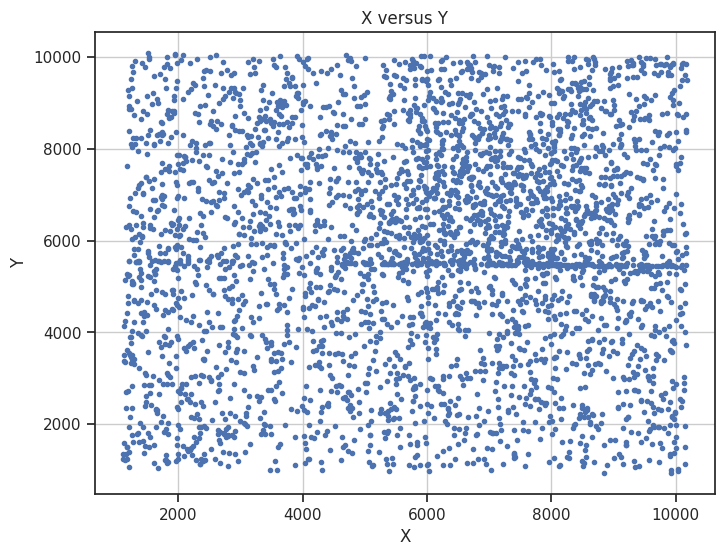

In [6]:
#Plting the pixel position
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(combined_df["x"], combined_df["y"], ".")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X versus Y')
plt.grid(True)
plt.show()

In [7]:
# Cleaned error

m_err = (combined_df["rerr"] <= 0.2) & (combined_df["gerr"] <= 0.2) & \
        (combined_df["ierr"] <= 0.2) & (combined_df["uerr"] <= 0.2) & \
        (combined_df["F378err"] <= 0.2) & (combined_df["F395err"] <= 0.2) & \
        (combined_df["F410err"] <= 0.2) & (combined_df["F430err"] <= 0.2) & \
        (combined_df["F515err"] <= 0.2) & (combined_df["F660err"] <= 0.2) & \
        (combined_df["F861err"] <= 0.2) & (combined_df["zerr"] <= 0.2)


In [8]:
df_cleanErr = combined_df[m_err]
len(df_cleanErr)

1928

In [9]:
#Selecting columns
columns = ["r",
"g",
"i",
"u",
"z",
"F378",
"F395",
"F410",
"F430",
"F515",
"F660",
"F861"]

In [10]:
df_mag = df_cleanErr[columns]
df_mag

,r,g,i,u,z,F378,F395,F410,F430,F515,F660,F861
5,18.230957,19.354897,17.535788,19.037668,16.876080,19.196240,18.976310,19.875435,19.322641,19.063953,16.866560,16.919794
18,17.534840,18.336254,17.170853,20.187351,16.968706,19.724620,19.729317,18.938953,18.896898,18.059500,17.259523,17.042841
22,18.483480,19.844840,17.338380,20.551367,16.677230,20.150150,19.926704,20.352129,20.450083,19.653934,17.486628,16.775530
26,17.863320,19.136410,17.048687,19.883158,16.445827,19.606777,19.543510,19.742111,19.557718,18.872030,17.332998,16.612194
28,17.681032,18.864336,17.329527,19.607306,16.627512,19.179401,19.058554,19.480520,19.050142,18.765682,16.344090,16.741743
...,...,...,...,...,...,...,...,...,...,...,...,...
3735,13.127157,14.364388,12.624421,17.112000,12.147956,16.680643,16.320915,15.598781,15.329178,14.310888,12.864580,12.204414
3736,15.637974,15.853651,15.490205,17.345404,15.230705,16.828485,16.692500,16.314852,16.305037,15.800333,15.462837,15.277567
3737,13.011990,14.210147,12.548910,17.032099,12.363142,17.034304,16.588572,15.726208,15.271949,13.951707,12.754676,12.091901
3738,14.515806,15.189921,14.210329,16.222795,14.051021,16.028465,15.921395,15.601741,15.537085,14.975911,14.187616,13.785573


### Creating the colors 

In [11]:
# Generate all combinations of magnitude columns
color_index_pairs = list(combinations(df_mag, 2))
len(color_index_pairs)

66

In [12]:
def calculate_earnings(df, index_pairs):
    for index_pair in index_pairs:
        color_index_name = f"{index_pair[0]} - {index_pair[1]}"
        df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
    return df

In [13]:
df_colors_mag = calculate_earnings(df_mag, color_index_pairs)

/tmp/ipykernel_181840/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_181840/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, color_index_name] = df[index_pair[0]] - df[index_pair[1]]
/tmp/ipykernel_181840/262842159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [14]:
df_colors_mag

,r,g,i,u,z,F378,F395,F410,F430,F515,...,F410 - F430,F410 - F515,F410 - F660,F410 - F861,F430 - F515,F430 - F660,F430 - F861,F515 - F660,F515 - F861,F660 - F861
5,18.230957,19.354897,17.535788,19.037668,16.876080,19.196240,18.976310,19.875435,19.322641,19.063953,...,0.552794,0.811482,3.008875,2.955641,0.258688,2.456081,2.402847,2.197393,2.144159,-0.053234
18,17.534840,18.336254,17.170853,20.187351,16.968706,19.724620,19.729317,18.938953,18.896898,18.059500,...,0.042055,0.879453,1.679430,1.896112,0.837398,1.637375,1.854057,0.799977,1.016659,0.216682
22,18.483480,19.844840,17.338380,20.551367,16.677230,20.150150,19.926704,20.352129,20.450083,19.653934,...,-0.097954,0.698195,2.865501,3.576599,0.796149,2.963455,3.674553,2.167306,2.878404,0.711098
26,17.863320,19.136410,17.048687,19.883158,16.445827,19.606777,19.543510,19.742111,19.557718,18.872030,...,0.184393,0.870081,2.409113,3.129917,0.685688,2.224720,2.945524,1.539032,2.259836,0.720804
28,17.681032,18.864336,17.329527,19.607306,16.627512,19.179401,19.058554,19.480520,19.050142,18.765682,...,0.430378,0.714838,3.136430,2.738777,0.284460,2.706052,2.308399,2.421592,2.023939,-0.397653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,13.127157,14.364388,12.624421,17.112000,12.147956,16.680643,16.320915,15.598781,15.329178,14.310888,...,0.269603,1.287893,2.734201,3.394367,1.018290,2.464598,3.124764,1.446308,2.106474,0.660166
3736,15.637974,15.853651,15.490205,17.345404,15.230705,16.828485,16.692500,16.314852,16.305037,15.800333,...,0.009815,0.514519,0.852015,1.037285,0.504704,0.842200,1.027470,0.337496,0.522766,0.185270
3737,13.011990,14.210147,12.548910,17.032099,12.363142,17.034304,16.588572,15.726208,15.271949,13.951707,...,0.454259,1.774501,2.971532,3.634307,1.320242,2.517273,3.180048,1.197031,1.859806,0.662775
3738,14.515806,15.189921,14.210329,16.222795,14.051021,16.028465,15.921395,15.601741,15.537085,14.975911,...,0.064656,0.625830,1.414125,1.816168,0.561174,1.349469,1.751512,0.788295,1.190338,0.402043


In [15]:
# Drop magniytudes
df_colors = df_colors_mag.drop(columns=columns)

In [16]:
df_colors

,r - g,r - i,r - u,r - z,r - F378,r - F395,r - F410,r - F430,r - F515,r - F660,...,F410 - F430,F410 - F515,F410 - F660,F410 - F861,F430 - F515,F430 - F660,F430 - F861,F515 - F660,F515 - F861,F660 - F861
5,-1.123940,0.695169,-0.806711,1.354877,-0.965283,-0.745353,-1.644478,-1.091684,-0.832996,1.364397,...,0.552794,0.811482,3.008875,2.955641,0.258688,2.456081,2.402847,2.197393,2.144159,-0.053234
18,-0.801414,0.363987,-2.652511,0.566134,-2.189780,-2.194477,-1.404113,-1.362058,-0.524660,0.275317,...,0.042055,0.879453,1.679430,1.896112,0.837398,1.637375,1.854057,0.799977,1.016659,0.216682
22,-1.361360,1.145100,-2.067887,1.806250,-1.666670,-1.443224,-1.868649,-1.966603,-1.170454,0.996852,...,-0.097954,0.698195,2.865501,3.576599,0.796149,2.963455,3.674553,2.167306,2.878404,0.711098
26,-1.273090,0.814633,-2.019838,1.417493,-1.743457,-1.680190,-1.878791,-1.694398,-1.008710,0.530322,...,0.184393,0.870081,2.409113,3.129917,0.685688,2.224720,2.945524,1.539032,2.259836,0.720804
28,-1.183304,0.351505,-1.926274,1.053520,-1.498369,-1.377522,-1.799488,-1.369110,-1.084650,1.336942,...,0.430378,0.714838,3.136430,2.738777,0.284460,2.706052,2.308399,2.421592,2.023939,-0.397653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,-1.237231,0.502736,-3.984843,0.979201,-3.553486,-3.193758,-2.471624,-2.202021,-1.183731,0.262577,...,0.269603,1.287893,2.734201,3.394367,1.018290,2.464598,3.124764,1.446308,2.106474,0.660166
3736,-0.215677,0.147769,-1.707430,0.407269,-1.190511,-1.054526,-0.676878,-0.667063,-0.162359,0.175137,...,0.009815,0.514519,0.852015,1.037285,0.504704,0.842200,1.027470,0.337496,0.522766,0.185270
3737,-1.198157,0.463080,-4.020109,0.648848,-4.022314,-3.576582,-2.714218,-2.259959,-0.939717,0.257314,...,0.454259,1.774501,2.971532,3.634307,1.320242,2.517273,3.180048,1.197031,1.859806,0.662775
3738,-0.674115,0.305477,-1.706989,0.464785,-1.512659,-1.405589,-1.085935,-1.021279,-0.460105,0.328190,...,0.064656,0.625830,1.414125,1.816168,0.561174,1.349469,1.751512,0.788295,1.190338,0.402043


# Reduction dimensionality

## UMAP 

Given that there are 66 variables, we use UMAP. I think UMAP is the best option because these variables are probably not linearly correlated. [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional spaces. If you have 66 variables and suspect they are not linearly correlated, UMAP could be a suitable method for exploring the structure of your data in a lower-dimensional space while preserving non-linear relationships. However, the effectiveness of UMAP depends on various factors, including the nature of your data and the specific goals of your analysis. It's always a good idea to experiment with different techniques and evaluate their performance based on your data and objectives.

In [17]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_colors)

#### Try cross-validation 

To perform cross-validation for choosing the optimal number of components in UMAP.

In [18]:
# Split data into training and validation sets
X_train, X_val = train_test_split(X_stand, test_size=0.2, random_state=42)

In [19]:
# Define a range of number of components to try
num_components_range = [2, 3, 4, 5, 10, 20, 50]
n_neighbors_range = [5, 10, 20, 50, 100]

best_num_components = None
best_n_neighbors = None
best_silhouette_score = -1  # Initialize with a low value

In [20]:
# Loop over different numbers of components and neighbors
for num_components in num_components_range:
    for n_neighbors in n_neighbors_range:
        # Fit UMAP model
        reducer_ = umap.UMAP(n_neighbors=n_neighbors, n_components=num_components, random_state=42)
        X_train_trans = reducer_.fit_transform(X_train)

        # Cluster the transformed data using KMeans
        kmeans = KMeans(n_clusters=num_components, random_state=42)
        labels = kmeans.fit_predict(X_train_trans)

        # Evaluate performance on validation set using Silhouette Score
        silhouette = silhouette_score(X_train_trans, labels, random_state=42)
        print(f"Number of components: {num_components}, Number of neighbors: {n_neighbors}, Silhouette Score: {silhouette}")

        # Update best parameters if necessary
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_num_components = num_components
            best_n_neighbors = n_neighbors
            best_labels = labels

Number of components: 2, Number of neighbors: 5, Silhouette Score: 0.5047717690467834
Number of components: 2, Number of neighbors: 10, Silhouette Score: 0.5620788335800171
Number of components: 2, Number of neighbors: 20, Silhouette Score: 0.5700295567512512
Number of components: 2, Number of neighbors: 50, Silhouette Score: 0.5441401600837708
Number of components: 2, Number of neighbors: 100, Silhouette Score: 0.5679096579551697
Number of components: 3, Number of neighbors: 5, Silhouette Score: 0.4046695828437805
Number of components: 3, Number of neighbors: 10, Silhouette Score: 0.4277380108833313
Number of components: 3, Number of neighbors: 20, Silhouette Score: 0.42905744910240173
Number of components: 3, Number of neighbors: 50, Silhouette Score: 0.43935227394104004
Number of components: 3, Number of neighbors: 100, Silhouette Score: 0.44344478845596313
Number of components: 4, Number of neighbors: 5, Silhouette Score: 0.4022199511528015
Number of components: 4, Number of neighb

In [21]:
# Output best parameters and corresponding silhouette score
print(f"Best number of components: {best_num_components}, Best number of neighbors: {best_n_neighbors}, Best Silhouette Score: {best_silhouette_score}")


Best number of components: 2, Best number of neighbors: 20, Best Silhouette Score: 0.5700295567512512


#### Try UMAP

In [22]:
num_components = 2
reducer = umap.UMAP(n_neighbors=20, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=num_components,  # min_samples=15, min_cluster_size=60
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)

Visualize the cumulative explained variance ratio:

In [23]:
# Calculate the variance of the original data points in the reduced space
original_variance = np.var(X_trans, axis=0)

# Calculate the explained variance ratio
explained_variance_ratio = original_variance / np.sum(original_variance)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

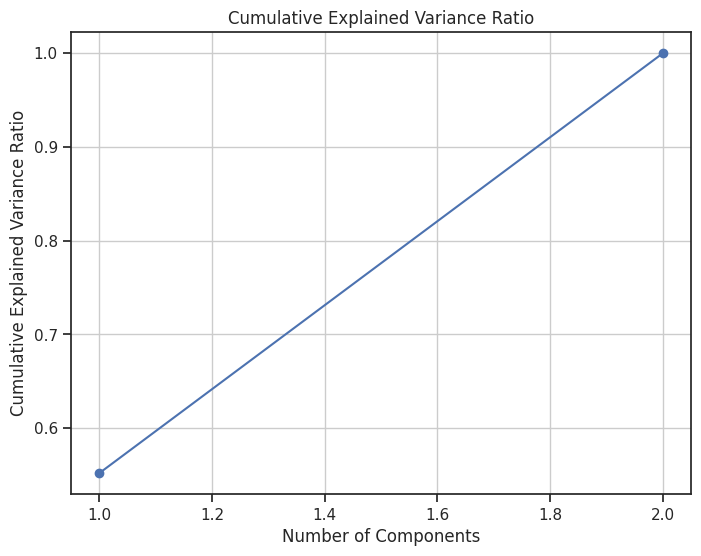

In [24]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [25]:
#umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
# Create a DataFrame for PCA results
umap_columns = [f'PC{i}' for i in range(1, num_components + 1)]
umap_df = pd.DataFrame(data=X_trans, columns=umap_columns)
umap_df

,PC1,PC2
0,5.814598,7.605496
1,8.895241,8.670889
2,5.012174,7.740332
3,5.145684,7.845706
4,5.961351,7.622213
...,...,...
1923,4.522886,10.785006
1924,12.606584,6.134189
1925,3.579147,11.812461
1926,10.098557,8.538299


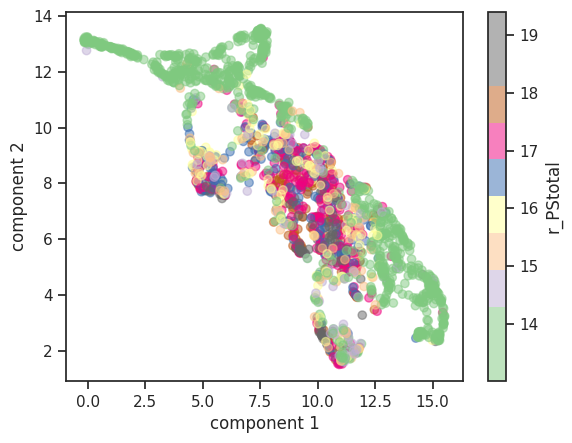

In [26]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC2"],
            c=df_cleanErr["r"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label='r_PStotal')  # Set the label of the color bar to 'g_PStotal'
plt.show()

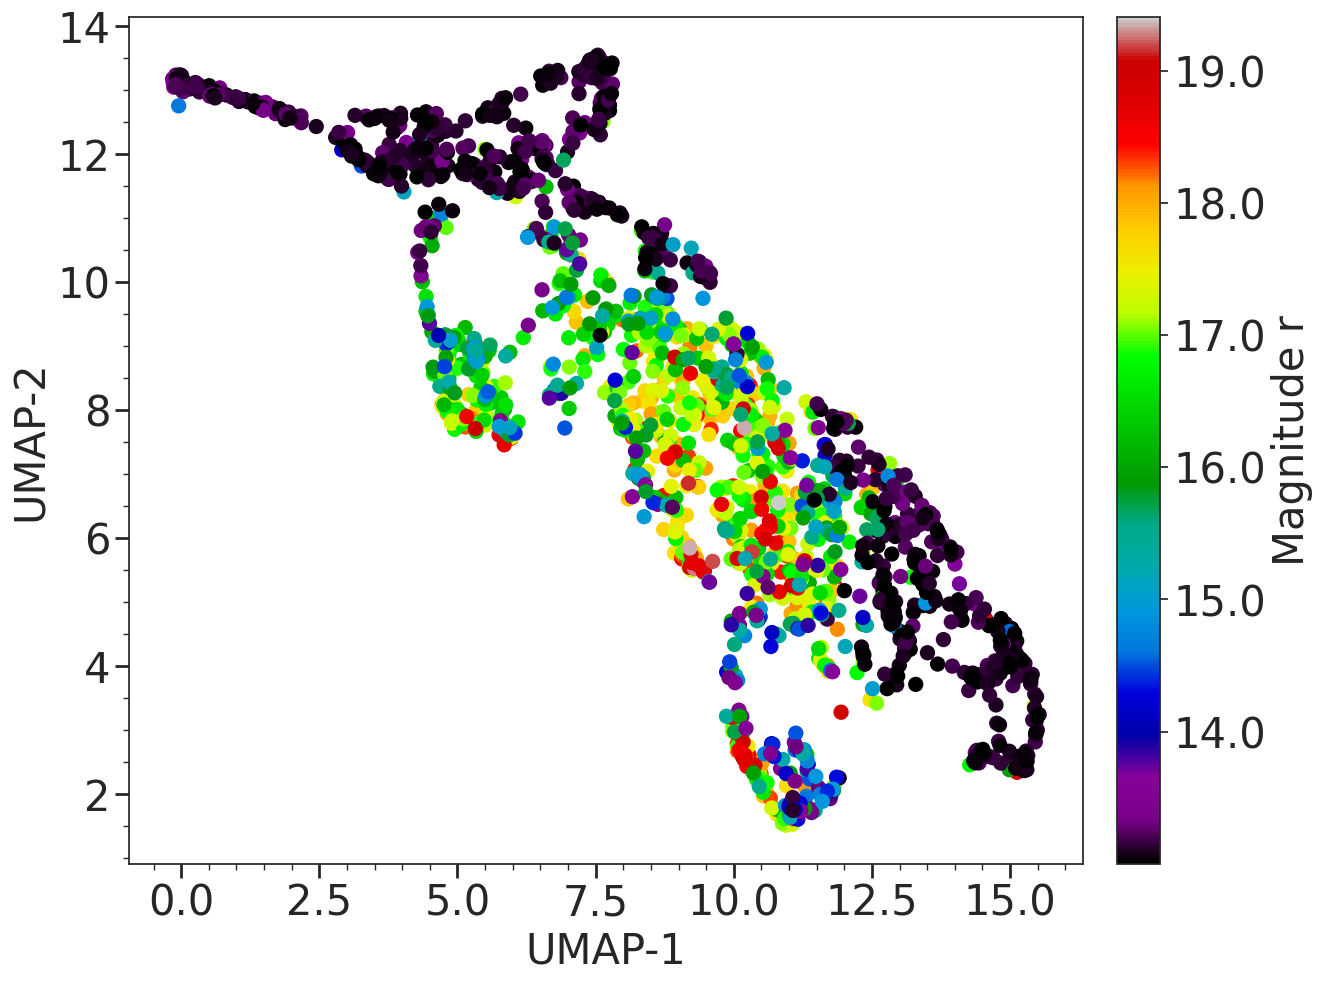

In [27]:
from matplotlib.ticker import MultipleLocator, NullFormatter

# Plotting
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    plt.xlabel("UMAP-1", fontsize=30)
    plt.ylabel("UMAP-2", fontsize=30)
    plt.tick_params(axis='x', labelsize=30, width=2, length=10)  # Adjusting width of tick marks
    plt.tick_params(axis='y', labelsize=30, width=2, length=10)  # Adjusting width of tick marks

    # Create a scatter plot
    sc = ax.scatter(umap_df["PC1"], umap_df["PC2"], c=df_cleanErr["r"], cmap="nipy_spectral", s=100)
    
    # Add minor tick locators without showing the minor ticks
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())

    # Add a colorbar with improved visibility
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    cbar.set_label("Magnitude r", fontsize=30)  # Provide a label for the colorbar
    cbar.ax.tick_params(labelsize=30)  # Adjust the size of the tick labels

plt.savefig("../Figs/umap_splus_disk.pdf")

## HDBSCAN 

#### Find the best parameters 

To find the best min_samples and min_cluster_size parameters for HDBSCAN, you typically perform a grid search over a range of values and evaluate the clustering performance using a metric such as silhouette score or another relevant metric.

Here's a general approach you can follow:

    Define a grid of parameters to search over for min_samples and min_cluster_size.
    For each combination of parameters:
        Fit HDBSCAN to your data.
        Evaluate the clustering performance using a metric such as silhouette score.
    Select the parameters that result in the highest clustering performance according to your chosen metric.

Here's how you can perform this grid search:

In [28]:

# Define the range of values for min_samples and min_cluster_size
min_samples_range = [5, 10, 15, 20, 25, 30, 35]  # Adjust as needed
min_cluster_size_range = [40, 50, 60, 80, 100, 120, 150]  # Adjust as needed

In [29]:
best_score = -1
best_params = {}


In [30]:
for min_samples in min_samples_range:
    for min_cluster_size in min_cluster_size_range:
        # Fit HDBSCAN with the current parameters
        clusterer_ = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        labels = clusterer_.fit_predict(X_trans)  # X is your data
        
        # Evaluate clustering performance using silhouette score
        silhouette_ = silhouette_score(X_trans, labels)
        
        # Check if current parameters result in a better silhouette score
        if silhouette_ > best_score:
            best_score = silhouette_
            best_params['min_samples'] = min_samples
            best_params['min_cluster_size'] = min_cluster_size

In [31]:
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'min_samples': 25, 'min_cluster_size': 150}
Best silhouette score: 0.30534253


### Applying HDBSCAN 

I foun that the best configurations of parameteres are 'min_samples': 5 and 'min_cluster_size': 100. We try then: 
But first try this min_samples=15, min_cluster_size=60

In [32]:
clusterer = hdbscan.HDBSCAN(min_samples=35, min_cluster_size=50, 
                             prediction_data=True, gen_min_span_tree=True)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1, gen_min_span_tree=True)


In [33]:

clusterer.fit(X_trans)
labels = clusterer.labels_
len(labels)

1928

In [34]:
clusterer.metric

'euclidean'

In [35]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_cluster3 = list(labels).count(3)
n_cluster4 = list(labels).count(4)
n_cluster5 = list(labels).count(5)
n_noise_ = list(labels).count(-1)


In [47]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of cluster points 3: %d' % n_cluster3)
print('Estimated number of cluster points 4: %d' % n_cluster4)
print('Estimated number of cluster points 5: %d' % n_cluster5)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 6
Estimated number of cluster points 0: 136
Estimated number of cluster points 1: 106
Estimated number of cluster points 2: 146
Estimated number of cluster points 3: 338
Estimated number of cluster points 4: 121
Estimated number of cluster points 5: 869
Estimated number of noise points: 212


<AxesSubplot: >

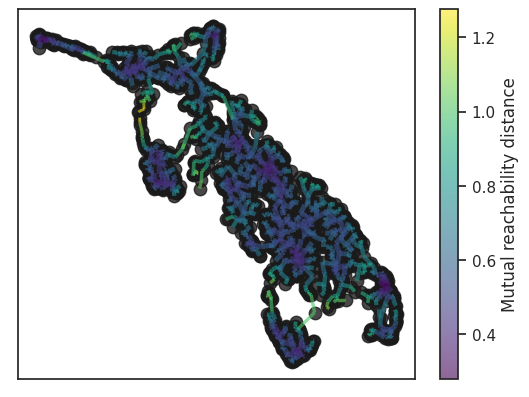

In [37]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)


### Build the cluster hierarchy 

<AxesSubplot: ylabel='distance'>

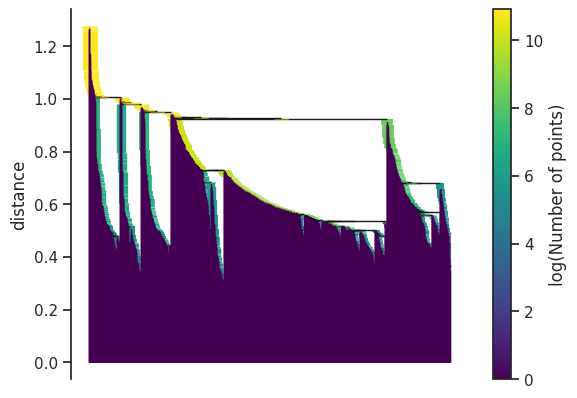

In [38]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Extract the clusters

<AxesSubplot: ylabel='$\\lambda$ value'>

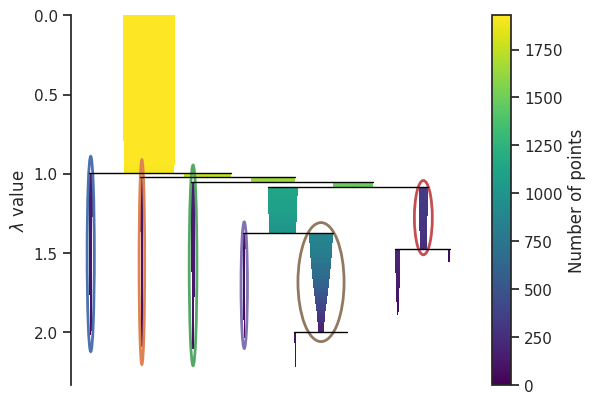

In [49]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

Plting the components

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

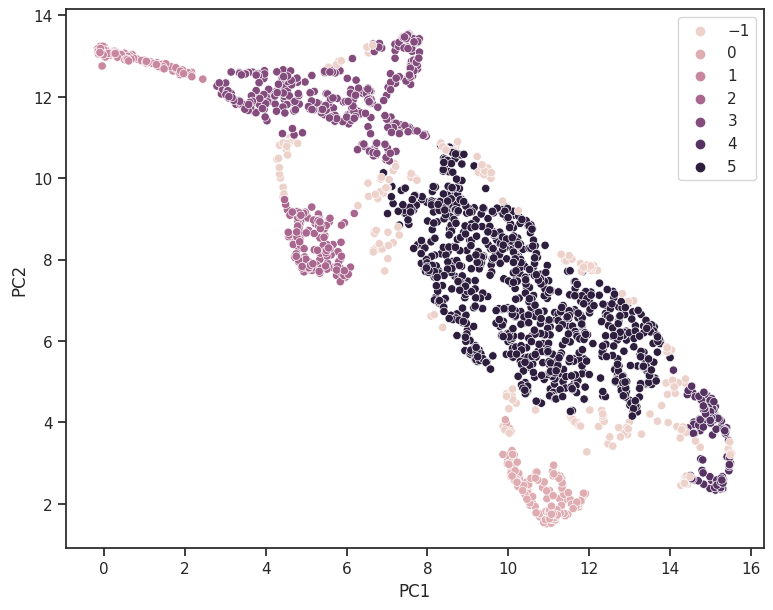

In [40]:

plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC2"], 
                hue=labels,
                )

In [41]:
# Concatenat the original claen table with the umap results
df_cleanErr.reset_index(drop=True, inplace=True)
umap_df.reset_index(drop=True, inplace=True)
df_cleanErr_umap = pd.concat([df_cleanErr, umap_df], axis=1)
df_cleanErr_umap

,NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,...,ellog_r,ellip_r,class_r,spread_r,flux_radius_r,area_r,mumax_r,kron_radius_r,PC1,PC2
0,8710,106.200785,-10.505256,19.037668,0.043265,19.354897,0.045797,18.230957,0.014984,17.535788,...,1.102869,0.093274,0.966052,0.000036,1.256337,28,19.002687,3.5,5.814598,7.605496
1,31027,96.380727,-11.498935,20.187351,0.116755,18.336254,0.022047,17.534840,0.012274,17.170853,...,1.008082,0.008017,0.982922,-0.000433,1.379769,58,18.487875,3.5,8.895241,8.670889
2,48545,104.706912,-11.509994,20.551367,0.109780,19.844840,0.039130,18.483480,0.014737,17.338380,...,1.060173,0.056758,0.982186,-0.000502,1.304611,37,19.300325,3.5,5.012174,7.740332
3,48419,106.005496,-11.604849,19.883158,0.062065,19.136410,0.032343,17.863320,0.013319,17.048687,...,1.028351,0.027569,0.981764,0.001995,1.478585,48,18.892345,3.5,5.145684,7.845706
4,54599,106.174438,-11.549660,19.607306,0.050901,18.864336,0.026002,17.681032,0.011791,17.329527,...,1.012328,0.012178,0.982828,-0.000939,1.438960,49,18.612950,3.5,5.961351,7.622213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,59540,134.262381,-58.181402,17.112000,0.018062,14.364388,0.002878,13.127157,0.000947,12.624421,...,1.049690,0.047338,0.998411,0.001047,1.784570,292,14.597100,3.5,4.522886,10.785006
1924,79661,132.966284,-58.011465,17.345404,0.021169,15.853651,0.007164,15.637974,0.003772,15.490205,...,1.217726,0.178797,0.975997,0.006430,1.986067,104,17.115864,3.5,12.606584,6.134189
1925,143006,133.407799,-57.484707,17.032099,0.016677,14.210147,0.002624,13.011990,0.000888,12.548910,...,1.214857,0.176858,0.980847,0.005627,2.224852,339,14.767982,3.5,3.579147,11.812461
1926,36408,132.131348,-59.674270,16.222795,0.007555,15.189921,0.003210,14.515806,0.001831,14.210329,...,1.190922,0.160315,0.986584,0.000839,1.751665,198,15.917403,3.5,10.098557,8.538299


Create the tables for each clase

In [42]:
df_cleanErr_umap["Label"] = labels

In [43]:
df_cleanErr_umap

,NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,...,ellip_r,class_r,spread_r,flux_radius_r,area_r,mumax_r,kron_radius_r,PC1,PC2,Label
0,8710,106.200785,-10.505256,19.037668,0.043265,19.354897,0.045797,18.230957,0.014984,17.535788,...,0.093274,0.966052,0.000036,1.256337,28,19.002687,3.5,5.814598,7.605496,2
1,31027,96.380727,-11.498935,20.187351,0.116755,18.336254,0.022047,17.534840,0.012274,17.170853,...,0.008017,0.982922,-0.000433,1.379769,58,18.487875,3.5,8.895241,8.670889,5
2,48545,104.706912,-11.509994,20.551367,0.109780,19.844840,0.039130,18.483480,0.014737,17.338380,...,0.056758,0.982186,-0.000502,1.304611,37,19.300325,3.5,5.012174,7.740332,2
3,48419,106.005496,-11.604849,19.883158,0.062065,19.136410,0.032343,17.863320,0.013319,17.048687,...,0.027569,0.981764,0.001995,1.478585,48,18.892345,3.5,5.145684,7.845706,2
4,54599,106.174438,-11.549660,19.607306,0.050901,18.864336,0.026002,17.681032,0.011791,17.329527,...,0.012178,0.982828,-0.000939,1.438960,49,18.612950,3.5,5.961351,7.622213,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,59540,134.262381,-58.181402,17.112000,0.018062,14.364388,0.002878,13.127157,0.000947,12.624421,...,0.047338,0.998411,0.001047,1.784570,292,14.597100,3.5,4.522886,10.785006,-1
1924,79661,132.966284,-58.011465,17.345404,0.021169,15.853651,0.007164,15.637974,0.003772,15.490205,...,0.178797,0.975997,0.006430,1.986067,104,17.115864,3.5,12.606584,6.134189,5
1925,143006,133.407799,-57.484707,17.032099,0.016677,14.210147,0.002624,13.011990,0.000888,12.548910,...,0.176858,0.980847,0.005627,2.224852,339,14.767982,3.5,3.579147,11.812461,3
1926,36408,132.131348,-59.674270,16.222795,0.007555,15.189921,0.003210,14.515806,0.001831,14.210329,...,0.160315,0.986584,0.000839,1.751665,198,15.917403,3.5,10.098557,8.538299,5


**Preliminary conlusions**\\
Wiht the parameters recomended by the Silhouette HDBSCAM fin two group, on which one corresponds to the EB. BUt using (min_samples=15, min_cluster_size=60 HDBCAM find four group one coressponds to to the EB, aother to CV and QSOS and AGN, and the other two to QSOS each one corresnp a specific redshift.

In [44]:
# Group the data based on the "Label" column
grouped_data = df_cleanErr_umap.groupby("Label")

In [45]:
# Define the directory where you want to save the CSV files
directory = '../Class_disk/'

In [46]:
# Iterate over each group
for label, group_df in grouped_data:
    if label == -1:  # Noise points
        filename = f'Halpha_emitter_disK_noise.csv'
    else:
        filename = f'Halpha_emitter_disk_group{label}.csv'
    group_df.to_csv(directory + filename, index=False)